In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys
sys.path.append("../src")

In [27]:
from data.datamodule import SignDataModule

In [29]:
datamodule = SignDataModule(max_sequence_length=48, normalize=False, substract=False)

In [129]:
for batch in datamodule.train_dataloader():
    print(batch[0].shape)
    print(batch[1].shape)
    break

(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
(48, 88, 3)
torch.Size([4, 264, 48])
torch.Size([4, 250])


In [32]:
from model.baseline import SignModel

ImportError: cannot import name 'SignModel' from 'model.tcn' (/ASL/notebooks/../src/model/tcn.py)

In [ ]:
model = SignModel(input_shape=264, hidden_units=[256, 128, 64], max_sequence_length=48)

In [ ]:
model(batch[0])

tensor([[0.0038, 0.0035, 0.0020, 0.0042, 0.0084, 0.0040, 0.0038, 0.0058, 0.0021,
         0.0037, 0.0062, 0.0036, 0.0043, 0.0044, 0.0024, 0.0037, 0.0040, 0.0033,
         0.0070, 0.0055, 0.0028, 0.0076, 0.0037, 0.0023, 0.0022, 0.0041, 0.0035,
         0.0033, 0.0059, 0.0013, 0.0008, 0.0094, 0.0063, 0.0056, 0.0101, 0.0034,
         0.0077, 0.0035, 0.0015, 0.0108, 0.0033, 0.0018, 0.0028, 0.0033, 0.0093,
         0.0032, 0.0041, 0.0020, 0.0011, 0.0020, 0.0035, 0.0036, 0.0015, 0.0034,
         0.0023, 0.0026, 0.0019, 0.0030, 0.0022, 0.0026, 0.0057, 0.0086, 0.0045,
         0.0034, 0.0026, 0.0060, 0.0077, 0.0042, 0.0015, 0.0011, 0.0055, 0.0054,
         0.0025, 0.0021, 0.0042, 0.0036, 0.0087, 0.0039, 0.0040, 0.0041, 0.0136,
         0.0047, 0.0028, 0.0031, 0.0046, 0.0031, 0.0058, 0.0058, 0.0030, 0.0019,
         0.0013, 0.0020, 0.0036, 0.0026, 0.0054, 0.0073, 0.0012, 0.0018, 0.0012,
         0.0098, 0.0032, 0.0020, 0.0028, 0.0018, 0.0023, 0.0047, 0.0014, 0.0016,
         0.0028, 0.0039, 0.0

In [33]:
from model.tcn import TCNClassifier

In [34]:
model = TCNClassifier(input_shape=264, max_sequence_length=48)

In [42]:
pred = model(batch[0])

In [47]:
import torch.nn.functional as F 
F.softmax(pred, dim=0).sum()

tensor(250., grad_fn=<SumBackward0>)

In [43]:
pred.shape

torch.Size([4, 250])

In [40]:
model.training_step(batch, 0)

torch.Size([4, 250])


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/core/module.py:418: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  rank_zero_warn(


tensor(5.5415, grad_fn=<DivBackward1>)

In [120]:
from model.vqvae import SignModel

In [145]:
model = SignModel(input_shape=264, max_sequence_length=48,num_dim=3, embedding_dim=64, num_embeddings=64)

Latent dim = (64, 12, 22)


In [148]:
x, x_hat, logits, loss = model(batch[0])

AttributeError: QuadMesh.set() got an unexpected keyword argument 'class_names'

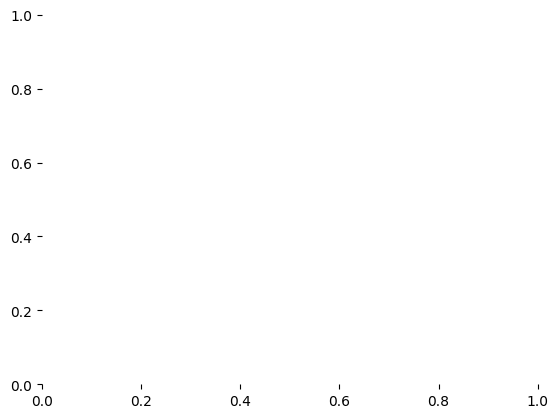

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = F.softmax(logits, dim=1)
y_pred = y_pred.argmax(dim=1)
y_true = batch[1].argmax(dim=1)
cm = confusion_matrix(y_true, y_pred, normalize="true", class_names=["01", "02", "03", "04"])
ax = sns.heatmap(cm, annot=True, )
ax.set(xlabel="Predicted label", ylabel="True label")